# Packages

In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions and constants

In [2]:
# run kindex_all_days.py and kindex_extreme_days.py by submitting jobs in GADI on the the terminal to get kindex_all_days.nc and kindex_extreme_days.nc

# Read data

In [5]:
# Load the NetCDF file and extract the 'K_index' variable for all days
all_days = xr.open_dataset('kindex_all_days.nc')
k_index_all_days = all_days['K_index'].values.flatten()  # Flatten to 1D array
k_index_all_days_clean = k_index_all_days[~np.isnan(k_index_all_days)]  # Remove NaN values

# Load the CSV file for extreme days
extreme_days = pd.read_csv('kindex_extreme_days.csv', parse_dates=['date'])
k_index_extreme_days_clean = extreme_days['K_index'].dropna()  # Remove NaN values


# Analysis

In [6]:
# Compute min and max for bin range
min_value = min(k_index_all_days_clean.min(), k_index_extreme_days_clean.min())
max_value = max(k_index_all_days_clean.max(), k_index_extreme_days_clean.max())

# Define bins for histogram
bins = np.linspace(min_value, max_value, 100)

# Compute mean values
mean_all_days = np.mean(k_index_all_days_clean)
mean_extreme_days = np.mean(k_index_extreme_days_clean)

# Plots

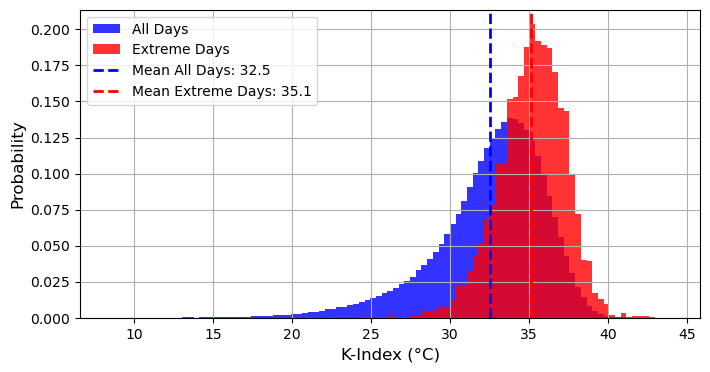

In [7]:
plt.figure(figsize=(8, 4))

# Histogram plots (PDF)
plt.hist(k_index_all_days_clean, bins=bins, density=True, alpha=0.8, color='blue', label='All Days')
plt.hist(k_index_extreme_days_clean, bins=bins, density=True, alpha=0.8, color='red', label='Extreme Days')

# Vertical dashed lines for mean values
plt.axvline(mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {mean_all_days:.1f}')
plt.axvline(mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {mean_extreme_days:.1f}')

# Labels, legend, and grid
plt.xlabel('K-Index (°C)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()